# **TEXT SUMMRIZATION USING NLP**
SR Manas 
R21DG040

##What is Text Summarization?

Text Summarization is the process of distilling the most important information from a source text.


## Examples of Text Summaries
• Headlines

• Outlines

• Minutes of meetings

• Previews

• Synopses

• Reviews

• Digests

• Biography

• Bulletins

• Sound bites

• Histories

## Automatic Text Summarization



Automatic text summarization is the process of creating a short and coherent version of a longer document.

##Why automatic text summarization

• Summaries reduce reading time.

• When researching documents, summaries make the selection process easier.

• Automatic summarization improves the effectiveness of indexing.

• Automatic summarization algorithms are less biased than human summarizers.

• Personalized summaries are useful in question-answering systems as they provide personalized information.

• Using automatic or semi-automatic summarization systems enables commercial abstract services to increase the number of text documents they are able to process.

## Types of Summarization
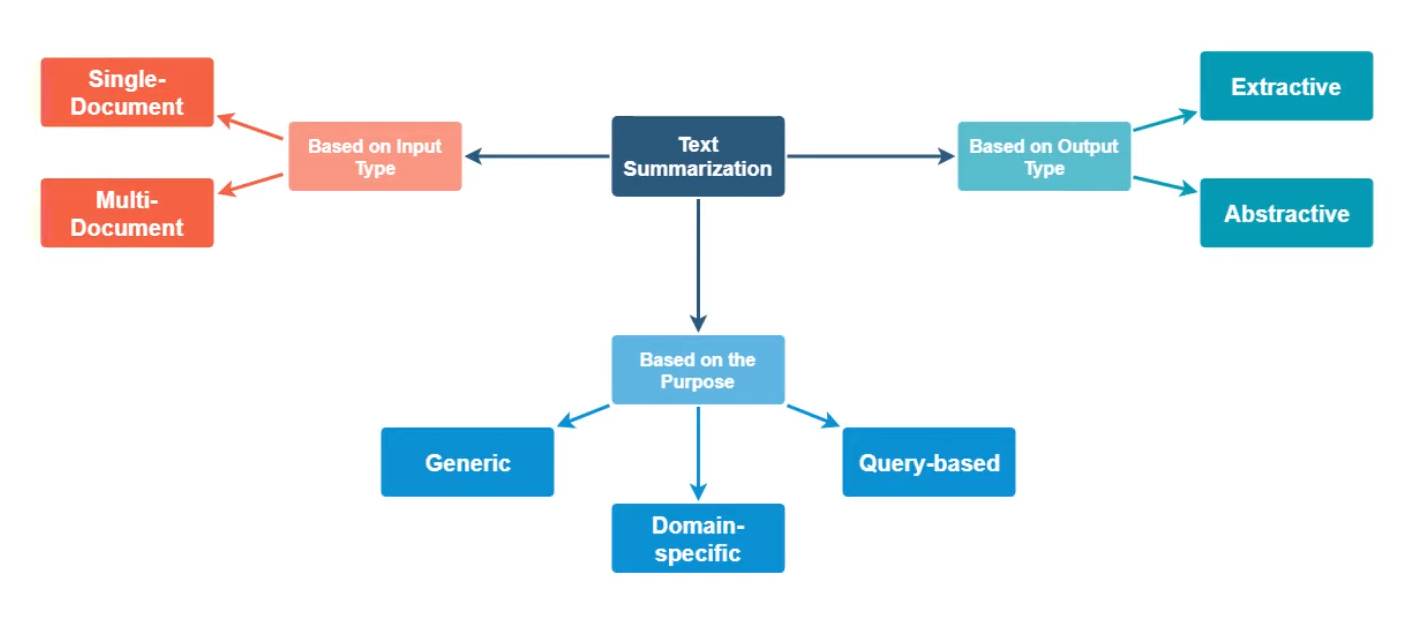

#Use Cases

• Media monitoring

• News letters

• Internal document workflow

• Financial research

• Legal contract analysis

• Social media marketing

• Video scripting

• Books and literature

• Science and R&D

• Patent research

## How to do text summarization

• Text cleaning

• Sentence Tokenization

• Word tokenization

• Word-frequency table

• Summarization

TEXT

In [ ]:
text = """There are broadly two types of extractive summarization tasks depending on what the summarization program focuses on. The first is generic summarization, which focuses on obtaining a generic summary or abstract of the collection (whether documents, or sets of images, or videos, news stories etc.). The second is query relevant summarization, sometimes called query-based summarization, which summarizes objects specific to a query. Summarization systems are able to create both query relevant text summaries and generic machine-generated summaries depending on what the user needs.

An example of a summarization problem is document summarization, which attempts to automatically produce an abstract from a given document. Sometimes one might be interested in generating a summary from a single source document, while others can use multiple source documents (for example, a cluster of articles on the same topic). This problem is called multi-document summarization. A related application is summarizing news articles. Imagine a system, which automatically pulls together news articles on a given topic (from the web), and concisely represents the latest news as a summary.

Image collection summarization is another application example of automatic summarization. It consists in selecting a representative set of images from a larger set of images.[9] A summary in this context is useful to show the most representative images of results in an image collection exploration system. Video summarization is a related domain, where the system automatically creates a trailer of a long video. This also has applications in consumer or personal videos, where one might want to skip the boring or repetitive actions. Similarly, in surveillance videos, one would want to extract important and suspicious activity, while ignoring all the boring and redundant frames captured."""

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

In [ ]:
#stop words
stopwords = list(STOP_WORDS)

In [ ]:
#nlp model
nlp = spacy.load('en_core_web_sm')

In [ ]:
#tokenization
doc = nlp(text)

In [ ]:
#list of tokens
token = [token.text for token in doc]
print(token)

In [ ]:
#Checking punctuation
punctuation = punctuation+ #'\n'
punctuation

In [ ]:
#word frequency
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
       if word.text not in word_frequencies.keys(): 
         word_frequencies[word.text] = 1
       else: 
         word_frequencies[word.text] += 1

In [ ]:
print(word_frequencies)

In [ ]:
#Maximum frequency
max_frequency = max(word_frequencies.values())

In [ ]:
max_frequency

In [ ]:
for word in word_frequencies.keys():
  word_frequencies[word] = word_frequencies[word]/max_frequency

In [ ]:
print(word_frequencies)

In [ ]:
#Sentence tokenization
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

In [ ]:
#Calculating sentence score
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_scores.keys():
        sentence_scores[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_scores[sent] += word_frequencies[word.text.lower()]

In [ ]:
sentence_scores

In [ ]:
from heapq import nlargest

In [ ]:
select_length = int(len(sentence_tokens)*0.3)
select_length

In [ ]:
#Extracting the most important sentences
summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)


In [ ]:
summary

In [ ]:
final_summary = [word.text for word in summary]

In [ ]:
summary = ' '.join(final_summary)

In [ ]:
print(text)

In [ ]:
print(summary)

In [ ]:
len(text)

In [ ]:
len(summary)